In [1]:
import numpy as np
from typing import Literal
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from typing import Literal

class HierarchicalClassification:
    def __init__(self, linkage: Literal["single", "complete", "average"] = 'single'):
        self.linkage = linkage

    def fit(self, data):
        data = np.array(data)
        n = len(data)

        proximity_matrix = np.full((n, n), np.inf, dtype=np.float32)
        for i in range(n):
            for j in range(i + 1, n):
                dist = self.distance(data[i], data[j])
                proximity_matrix[i, j] = dist

        clusters = {i: [i] for i in range(n)}
        cluster_sizes = {i: 1 for i in range(n)}

        linkage_matrix = []

        current_cluster_id = n

        while len(clusters) > 1:
            min_dist = np.inf
            pair_to_merge = None

            cluster_ids = list(clusters.keys())
            for i in range(len(cluster_ids)):
                for j in range(i + 1, len(cluster_ids)):
                    c1 = cluster_ids[i]
                    c2 = cluster_ids[j]

                    dist = self.linkage_distance(clusters[c1], clusters[c2], data)
                    if dist < min_dist:
                        min_dist = dist
                        pair_to_merge = (c1, c2)

            c1, c2 = pair_to_merge

            size1 = cluster_sizes[c1]
            size2 = cluster_sizes[c2]
            linkage_matrix.append([c1, c2, min_dist, size1 + size2])

            new_cluster_members = clusters[c1] + clusters[c2]


            del clusters[c1]
            del clusters[c2]
            del cluster_sizes[c1]
            del cluster_sizes[c2]

            clusters[current_cluster_id] = new_cluster_members
            cluster_sizes[current_cluster_id] = size1 + size2

            current_cluster_id += 1

        return np.array(linkage_matrix)

    def linkage_distance(self, cluster1, cluster2, data):
        distances = []
        for i in cluster1:
            for j in cluster2:
                dist = self.distance(data[i], data[j])
                distances.append(dist)

        if self.linkage == 'single':
            return min(distances)
        elif self.linkage == 'complete':
            return max(distances)
        elif self.linkage == 'average':
            return np.mean(distances)
        else:
            raise ValueError(f"Unknown linkage type: {self.linkage}")

    def distance(self, p1, p2):
        return np.sqrt(np.sum((p1 - p2) ** 2))

In [3]:
model = HierarchicalClassification()
matrix = model.fit([18, 22, 25, 27, 42, 43])

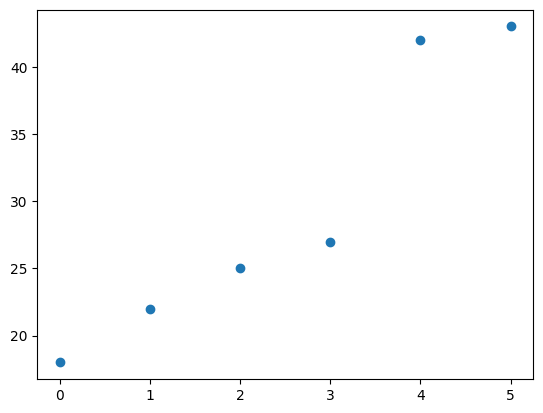

In [5]:
plt.scatter([0, 1, 2, 3, 4, 5], [18, 22, 25, 27, 42, 43])
plt.show()

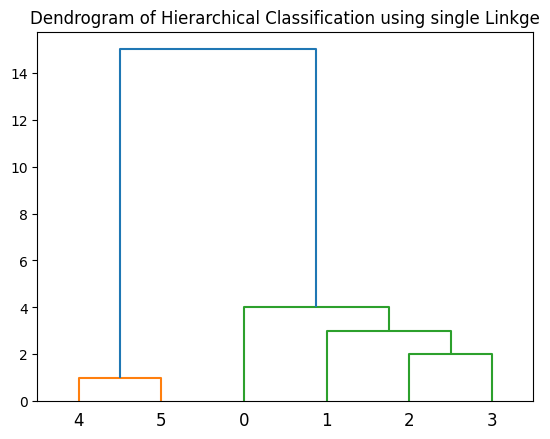

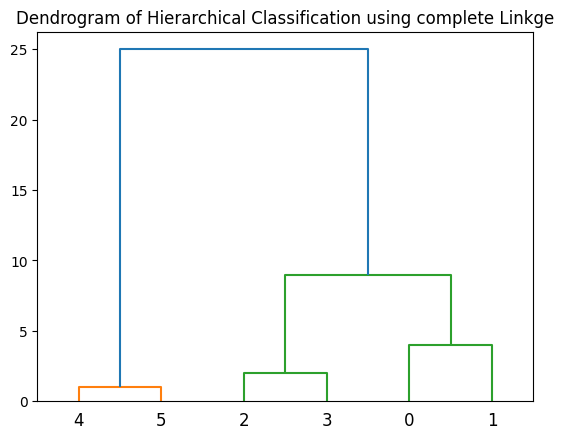

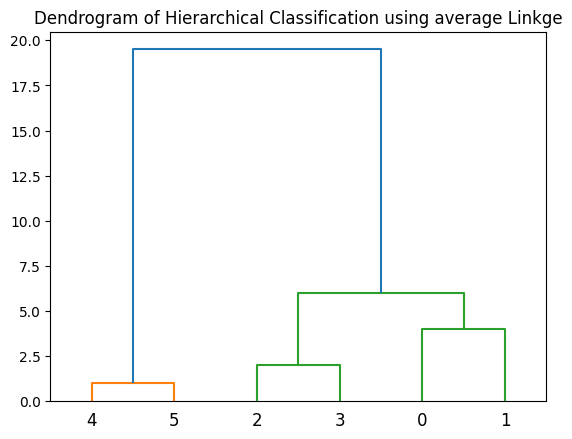

In [8]:
for linkage in ['single', 'complete', 'average']:
    model = HierarchicalClassification(linkage)
    matrix = model.fit([18, 22, 25, 27, 42, 43])

    dendrogram(matrix)
    plt.title(f'Dendrogram of Hierarchical Classification using {linkage} Linkge')
    plt.show()